During buy and sell of each strategy, please give buy/sell like below instead of like you have presently given, \\
if symbol not in (list_buy_stock+list_sell_stock): \\
it will help to minimize loss when direction suddenly reverses again 

                    if item not in (list1) :
                        if  hma_diff[-1:].values[0] > 0 and hma_diff[-1:].values[0] > hma_diff[-2:-1].values[0] and df.RSI_14[-1:].values[0] > df.RSI_14[-4:].mean() and df.RSI_14[-4:].mean() > df.RSI_14[-6:-2].mean() :
                            dict1["{}_buy".format(item)] = df["close"][-1:].values[0]
                            if item in list2:
                                print([str(now), item,df["close"][-1:].values[0],dict1["{}_sell".format(item)]-df["close"][-1:].values[0], " stoploss SELLing derivative",c])
                                list2.remove(item)
                                list3.append(dict1["{}_sell".format(item)]-df["close"][-1:].values[0])
                            print([str(now), item,df["close"][-1:].values[0], "BUYing dervative",hma_diff[-1:].values[0] ])
                            list1.append(item)
                            continue
                    if item not in (list2):
                        if hma_diff[-1:].values[0] < 0 and hma_diff[-1:].values[0] < hma_diff[-2:-1].values[0] and df.RSI_14[-1:].values[0] < df.RSI_14[-4:].mean() and df.RSI_14[-4:].mean() < df.RSI_14[-6:-2].mean():
                            dict1["{}_sell".format(item)] = df["close"][-1:].values[0]
                            if item in list1:
                                print([str(now), item,df["close"][-1:].values[0],df["close"][-1:].values[0]-dict1["{}_buy".format(item)], " stoploss BUYing derivative",c])
                                list1.remove(item)
                                list3.append(df["close"][-1:].values[0] - dict1["{}_buy".format(item)])   
                            print([str(now), item,df["close"][-1:].values[0], "SELLing dervative",hma_diff[-1:].values[0] ])
                            list2.append(item)
                            continue  

In [ ]:
!pip3  install python-binance
!pip3 install pandas-ta
!pip3 install mplfinance
!pip3 install icecream

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 3.1MB 6.5MB/s 
     |████████████████████████████████| 3.2MB 34.7MB/s 
     |████████████████████████████████| 501kB 46.6MB/s 
     |████████████████████████████████| 286kB 54.6MB/s 
     |████████████████████████████████| 184kB 42.3MB/s 
     |████████████████████████████████| 256kB 41.0MB/s 
     |████████████████████████████████| 81kB 8.0MB/s 
     |████████████████████████████████| 92kB 3.6MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.2.45b0-cp37-none-any.whl size=175305 sha256=69e6bd06516b2db72eb6e730dc85db16351a09725fcc9264de86179127851b84
  Stored in directory: /root/.cache/pip/wheels/78/76/74/e4b09c98fc91d7e1e0a56f4fe067796f216deacaa509234579
Successfully built pandas-ta
     |████████████████████████████████| 71kB 3.6MB/s 


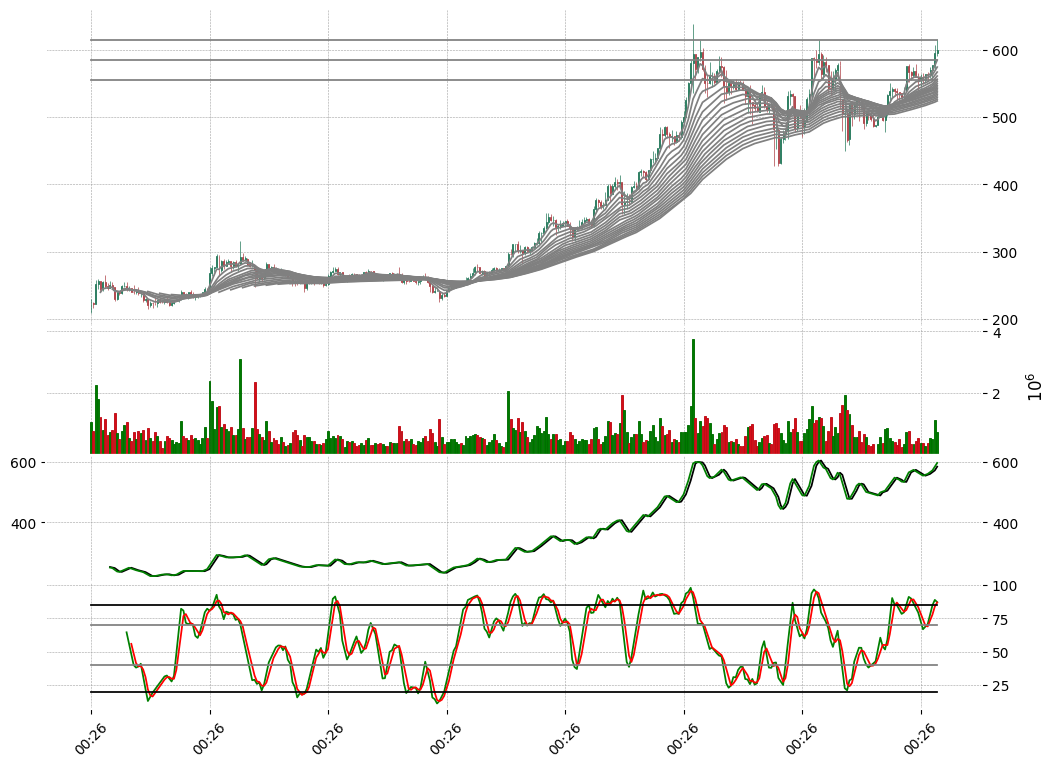

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)

# fetch 1 minute klines for the last day up until now
#klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("BNBUSDT", '4h', "1 Mar, 2021") # BTCUSDT, ETHUSDT, BNBUSDT, DOGEUSDT 

# fetch weekly klines since it listed
#klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")

data = []
for item in klines:
    data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
df= pd.DataFrame(data)
df.set_index(['date'], inplace=True)

df.index = pd.to_datetime(df.index)

df.ta.stoch(append=True)
open_hma = ta.hma(df['open'],8)
close_hma = ta.hma(df['close'],8)
meanv = ta.ema(df['close'],5)[-1:].values[0]
ap0 = [ mpf.make_addplot(open_hma,color='black',panel=2), # uses panel 0 by default
        mpf.make_addplot(close_hma,color='green',panel=2),  # uses panel 0 by default
        mpf.make_addplot(np.array([1.05*meanv for i in range(len(df))]),color='gray',),
        mpf.make_addplot(np.array([meanv for i in range(len(df))]),color='gray',),
        mpf.make_addplot(np.array([0.95*meanv for i in range(len(df))]),color='gray',),
       
       mpf.make_addplot(df['STOCHk_14_3_3'],color='green',panel=3),
       mpf.make_addplot(df['STOCHd_14_3_3'],color='red',panel=3),
       mpf.make_addplot(np.array([40 for i in range(len(df))]),color='gray',panel=3),
       mpf.make_addplot(np.array([70 for i in range(len(df))]),color='gray',panel=3),
       mpf.make_addplot(np.array([20 for i in range(len(df))]),color='black',panel=3),
       mpf.make_addplot(np.array([85 for i in range(len(df))]),color='black',panel=3),

       mpf.make_addplot(ta.ema(df['close'],5),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],10),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],15),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],20),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],25),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],30),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],35),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],40),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],45),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],50),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],55),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],60),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],65),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],70),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],75),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],80),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],85),color='gray',),
       mpf.make_addplot(ta.ema(df['close'],90),color='gray',),
      #  mpf.make_addplot(ta.ema(df['close'],95),color='gray',),
      #  mpf.make_addplot(ta.ema(df['close'],100),color='gray',),
      ]
mpf.plot(df, type='candle', style='charles',
        title='',
        ylabel='',
        ylabel_lower='',
        volume=True, 
        figsize=(13, 10),

        addplot=ap0)

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import time
from datetime import date,datetime

LIME,MAROON,RUBI,GREEN,GRAY=1,-2,-1,2,0

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)

# fetch 1 minute klines for the last day up until now
#klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
klines = client.get_historical_klines("BTCUSDT", '30m', "15 Apr, 2021", "22 Apr, 2021") # BTCUSDT, ETHUSDT, BNBUSDT, DOGEUSDT 

# fetch weekly klines since it listed
#klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")
def time2datetime(tmsec):
  tsec=int(tmsec)/1000
  t=list(time.gmtime(tsec))
  d=datetime(year=t[0],month=t[1],day=t[2],hour=t[3],minute=t[4])
  return d

data = []
for item in klines:
    data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
df= pd.DataFrame(data)
df.set_index(['date'], inplace=True)
df.index=df.index.map(time2datetime)
#df.index = pd.to_datetime(df.index)


def maColor(_ma,_maref):
  diffma=change(_ma)
  length=len(_ma)
  res=np.zeros((length),dtype=np.int32)
  res[(diffma>=0) & (_ma>_maref)]=LIME
  #res[~((diffma>=0) & (_ma>_maref)) & ((diffma<0) & (_ma>_maref))]=MAROON
  res[(diffma<0) & (_ma>_maref)]=MAROON
  #res[~((diffma>=0) & (_ma>_maref)) & ~((diffma<0) & (_ma>_maref)) & ((diffma<=0) & (_ma<_maref))]=RUBI
  res[(diffma<=0) & (_ma<_maref)]=RUBI
  #res[~((diffma>=0) & (_ma>_maref)) & ~((diffma<0) & (_ma>_maref)) & ~((diffma<=0) & (_ma<_maref)) & ((diffma>=0) & (_ma<_maref))]=GREEN
  res[(diffma>=0) & (_ma<_maref)]=GREEN
  res[~(((diffma>=0) & (_ma>_maref)) | ((diffma<0) & (_ma>_maref)) | ((diffma<=0) & (_ma<_maref)) | ((diffma>=0) & (_ma<_maref)))]=GRAY
  return pd.Series(res)


#just a second implementation of the same thing
def maColor2(_ma,_maref):
  diffma=change(_ma)
  length=len(_ma)
  res=np.zeros((length),dtype=np.int32)
  for i in range(length):
    if diffma.iloc[i]>=0 and _ma.iloc[i]>_maref.iloc[i]:
      res[i]=LIME
    elif diffma.iloc[i]<0 and _ma.iloc[i]>_maref.iloc[i]:
      res[i]=MAROON
    elif diffma.iloc[i]<=0 and _ma.iloc[i]<_maref.iloc[i]:
      res[i]=RUBI
    elif diffma.iloc[i]>=0 and _ma.iloc[i]<_maref.iloc[i]:
      res[i]=GREEN
    else:
      res[i]=GRAY

  return pd.Series(res)


def change(_ma,by=1):
  #fillval=0
  _ma=_ma.astype(np.float64)
  s=pd.Series(_ma)
  _s=s.shift(1)
  return s-_s

i_exp=True
src=df['close']

ma05  = ta.ema(src, 5) if i_exp else ta.sma(src, 5)
ma10  = ta.ema(src, 10) if i_exp else ta.sma(src, 10)
ma15  = ta.ema(src, 15) if i_exp else ta.sma(src, 15)
ma20  = ta.ema(src, 20) if i_exp else ta.sma(src, 20)
ma25  = ta.ema(src, 25) if i_exp else ta.sma(src, 25)
ma30  = ta.ema(src, 30) if i_exp else ta.sma(src, 30)
ma35  = ta.ema(src, 35) if i_exp else ta.sma(src, 35)
ma40  = ta.ema(src, 40) if i_exp else ta.sma(src, 40)
ma45  = ta.ema(src, 45) if i_exp else ta.sma(src, 45)
ma50  = ta.ema(src, 50) if i_exp else ta.sma(src, 50)
ma55  = ta.ema(src, 55) if i_exp else ta.sma(src, 55)
ma60  = ta.ema(src, 60) if i_exp else ta.sma(src, 60)
ma65  = ta.ema(src, 65) if i_exp else ta.sma(src, 65)
ma70  = ta.ema(src, 70) if i_exp else ta.sma(src, 70)
ma75  = ta.ema(src, 75) if i_exp else ta.sma(src, 75)
ma80  = ta.ema(src, 80) if i_exp else ta.sma(src, 80)
ma85  = ta.ema(src, 85) if i_exp else ta.sma(src, 85)
ma90  = ta.ema(src, 90) if i_exp else ta.sma(src, 90)
ma100 = ta.ema(src, 100) if i_exp else ta.sma(src, 100)


p=pd.DataFrame()
for i in range(5,95,5):
  p['ma0{}'.format(i) if i==5 else 'ma{}'.format(i)]=maColor(eval('ma0{}'.format(i)) if i==5 else eval('ma{}'.format(i)),ma100)
p.index=df.index

In [ ]:
pd.set_option('display.max_rows', 500)
p

,ma05,ma10,ma15,ma20,ma25,ma30,ma35,ma40,ma45,ma50,ma55,ma60,ma65,ma70,ma75,ma80,ma85,ma90
date,,,,,,,,,,,,,,,,,,
2021-04-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 00:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 01:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 01:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 02:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 03:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 03:30:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-15 04:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma+list_sell_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def stock_strategy(symbol):
    if symbol not in (list_buy_stock+list_sell_stock):
      if df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
      if df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_stock:
      if (df['close'].iloc[-1]<a*map_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_stock['buy_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
        list_buy_stock.remove(symbol)
        list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_stock:
      if (df['close'].iloc[-1]>b*map_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_stock['sell_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_stock.remove(symbol)
        list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def hma_stock_strategy(symbol):

    if symbol not in (list_buy_hma_stock+list_sell_hma_stock):
      if open_hma.iloc[-1]<close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma_stock:
      if (df['close'].iloc[-1]<a*map_hma_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma_stock['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
        list_buy_hma_stock.remove(symbol)
        list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        return
        
    if symbol in list_sell_hma_stock:
      if (df['close'].iloc[-1]>b*map_hma_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma_stock['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma_stock.remove(symbol)
        list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT']

profit=[]
#while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
stop_loss=[(0.991,1.009),(0.993,1.01),(0.993,1.007),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
for a,b in stop_loss:
  
  list_buy_hma=[]
  list_sell_hma=[]
  list_profit_hma=[]
  map_hma={}
  removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_stock=[]
  list_sell_stock=[]
  list_profit_stock=[]
  map_stock={}
  removed_data_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_hma_stock=[]
  list_sell_hma_stock=[]
  list_profit_hma_stock=[]
  map_hma_stock={}
  removed_data_hma_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])


  print('\n\n{},{} :-\n\n'.format(a,b))
  for hours in range(300,0,-2):
    
  
    for symbol in item_list:

        try: 
          #print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          stock_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          hma_stock_strategy(symbol)

            
        except Exception as e:
          print(e)

  print('hma profit\n',sum(list_profit_hma))
  print('stock profit\n',sum(list_profit_stock))
  print('hma stock profit\n',sum(list_profit_hma_stock))
  profit.append((list_profit_hma,list_profit_stock,list_profit_hma_stock))
  




0.991,1.009 :-


hma profit
 0.35247690028116174
stock profit
 0.20150748142628283
hma stock profit
 0.4850603953629533


0.993,1.01 :-


hma profit
 0.32942917740699795
stock profit
 0.21304113431812632
hma stock profit
 0.4761832115856005


0.993,1.007 :-


hma profit
 0.3114816718391562
stock profit
 0.07146088467981981
hma stock profit
 0.4543932813003877


0.995,1.005 :-


hma profit
 0.40600394051498
stock profit
 -0.00042231409270554465
hma stock profit
 0.4612403798487096


0.997,1.003 :-


hma profit
 0.48034564809829605
stock profit
 0.11466681125342226
hma stock profit
 0.5428113123933173


0.999,1.001 :-


hma profit
 0.5688691581791753
stock profit
 0.09280753214037696
hma stock profit
 0.5433745627036995


In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def stock_strategy(symbol):
    if symbol not in list_buy_stock:
      if df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_stock:
          removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_stock.remove(symbol)
          list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_stock:
      if df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_stock:
          removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
          list_buy_stock.remove(symbol)
          list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        list_sell_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_stock:
      if (df['close'].iloc[-1]<a*map_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_stock['buy_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
        list_buy_stock.remove(symbol)
        list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_stock:
      if (df['close'].iloc[-1]>b*map_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_stock['sell_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_stock.remove(symbol)
        list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def hma_stock_strategy(symbol):

    if symbol not in list_buy_hma_stock:
      if open_hma.iloc[-1]<close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_hma_stock:
          removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma_stock.remove(symbol)
          list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_hma_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
        
    if symbol not in list_sell_hma_stock:
      if open_hma.iloc[-1]>close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_hma_stock:
          removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
          list_buy_hma_stock.remove(symbol)
          list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        list_sell_hma_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma_stock:
      if (df['close'].iloc[-1]<a*map_hma_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma_stock['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
        list_buy_hma_stock.remove(symbol)
        list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        #print(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma_stock:
      if (df['close'].iloc[-1]>b*map_hma_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma_stock['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma_stock.remove(symbol)
        list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT']

profit=[]
#while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
for a,b in stop_loss:
  
  list_buy_hma=[]
  list_sell_hma=[]
  list_profit_hma=[]
  map_hma={}
  removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_stock=[]
  list_sell_stock=[]
  list_profit_stock=[]
  map_stock={}
  removed_data_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_hma_stock=[]
  list_sell_hma_stock=[]
  list_profit_hma_stock=[]
  map_hma_stock={}
  removed_data_hma_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])


  print('\n\n{},{} :-\n\n'.format(a,b))
  for hours in range(300,0,-2):
    
  
    for symbol in item_list:

        try: 
          
          #print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          stock_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          hma_stock_strategy(symbol)

            
        except Exception as e:
          print(e)

  print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
  print('stock profit\n',sum(list_profit_stock),len(list_profit_stock),(np.array(list_profit_stock)>0).sum(),(np.array(list_profit_stock)<0).sum())
  print('hma stock profit\n',sum(list_profit_hma_stock),len(list_profit_hma_stock),(np.array(list_profit_hma_stock)>0).sum(),(np.array(list_profit_hma_stock)<0).sum())
  profit.append((list_profit_hma,list_profit_stock,list_profit_hma_stock))
  




0.993,1.009 :-


hma profit
 1.417443352927348 170 83 84
stock profit
 -0.3056496266313642 178 83 92
hma stock profit
 0.6555299292462494 135 59 74


0.993,1.01 :-


hma profit
 1.4176230249456465 168 82 83
stock profit
 -0.30546995461306603 176 82 91
hma stock profit
 0.6556948563512526 133 58 73


0.992,1.015 :-


hma profit
 1.416349182083125 148 70 75
stock profit
 -0.30716495245400033 154 71 80
hma stock profit
 0.7248749519295062 114 48 64


0.99,1.02 :-


hma profit
 1.4127955113847495 134 62 69
stock profit
 -0.30867910755674044 142 63 76
hma stock profit
 0.7066332450932835 105 42 61


0.983,1.02 :-


hma profit
 1.4152484696021765 124 56 65
stock profit
 -0.30711482520984246 132 58 71
hma stock profit
 0.6979642239749534 96 37 57


In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma+list_sell_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def stock_strategy(symbol):
    if symbol not in (list_buy_stock+list_sell_stock):
      if df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
      if df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_stock:
      if (df['close'].iloc[-1]<a*map_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_stock['buy_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
        list_buy_stock.remove(symbol)
        list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_stock:
      if (df['close'].iloc[-1]>b*map_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_stock['sell_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_stock.remove(symbol)
        list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def hma_stock_strategy(symbol):

    if symbol not in (list_buy_hma_stock+list_sell_hma_stock):
      if open_hma.iloc[-1]<close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma_stock:
      if (df['close'].iloc[-1]<a*map_hma_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma_stock['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
        list_buy_hma_stock.remove(symbol)
        list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        return
        
    if symbol in list_sell_hma_stock:
      if (df['close'].iloc[-1]>b*map_hma_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma_stock['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma_stock.remove(symbol)
        list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT']

profit=[]
#while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
stop_loss=[(0.991,1.009),(0.993,1.01),(0.993,1.007),(0.995,1.005),(0.997,1.003),(0.999,1.001)]
for a,b in stop_loss:
  
  list_buy_hma=[]
  list_sell_hma=[]
  list_profit_hma=[]
  map_hma={}
  removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_stock=[]
  list_sell_stock=[]
  list_profit_stock=[]
  map_stock={}
  removed_data_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_hma_stock=[]
  list_sell_hma_stock=[]
  list_profit_hma_stock=[]
  map_hma_stock={}
  removed_data_hma_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])


  print('\n\n{},{} :-\n\n'.format(a,b))
  for hours in range(300,0,-2):
    
  
    for symbol in item_list:

        try: 
          #print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          stock_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          hma_stock_strategy(symbol)

            
        except Exception as e:
          print(e)

  print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
  print('stock profit\n',sum(list_profit_stock),len(list_profit_stock),(np.array(list_profit_stock)>0).sum(),(np.array(list_profit_stock)<0).sum())
  print('hma stock profit\n',sum(list_profit_hma_stock),len(list_profit_hma_stock),(np.array(list_profit_hma_stock)>0).sum(),(np.array(list_profit_hma_stock)<0).sum())
  profit.append((list_profit_hma,list_profit_stock,list_profit_hma_stock))
  




0.991,1.009 :-


hma profit
 1.459558935954424 122 61 61
stock profit
 0.7568373158183035 128 62 66
hma stock profit
 1.223913023841426 107 48 59


0.993,1.01 :-


hma profit
 1.6989457125110288 133 65 68
stock profit
 0.5338279662786691 137 64 73
hma stock profit
 1.1977382192633061 115 50 65


0.993,1.007 :-


hma profit
 1.6017329778241012 141 67 74
stock profit
 0.49907450423957833 145 65 80
hma stock profit
 1.1803015913328532 123 52 71


0.995,1.005 :-


hma profit
 1.5112464604344296 165 78 87
stock profit
 0.4543501067316733 172 77 95
hma stock profit
 1.1990243909012281 143 62 81


0.997,1.003 :-


hma profit
 1.6523428150974522 185 90 95
stock profit
 0.5134631380845593 193 90 103
hma stock profit
 1.280609499373864 155 69 86


0.999,1.001 :-


hma profit
 1.661139099112331 219 106 113
stock profit
 0.3521995937470461 229 106 123
hma stock profit
 1.2207213189464414 185 82 103



# **For Live Market :-**

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma+list_sell_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<0.993*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>1.01*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.993*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def stock_strategy(symbol):
    if symbol not in (list_buy_stock+list_sell_stock):
      if df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
      if df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_stock:
      if (df['close'].iloc[-1]<0.993*map_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_stock['buy_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
        list_buy_stock.remove(symbol)
        list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_stock:
      if (df['close'].iloc[-1]>1.01*map_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.993*map_stock['sell_{}'.format(symbol)]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_stock.remove(symbol)
        list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def hma_stock_strategy(symbol):

    if symbol not in (list_buy_hma_stock+list_sell_hma_stock):
      if open_hma.iloc[-1]<close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        list_buy_hma_stock.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

      if open_hma.iloc[-1]>close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        list_sell_hma_stock.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma_stock:
      if (df['close'].iloc[-1]<0.993*map_hma_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_hma_stock['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['buy_{}'.format(symbol)]-df['close'].iloc[-1],'exit bought']
        #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
        list_buy_hma_stock.remove(symbol)
        list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        return
        
    if symbol in list_sell_hma_stock:
      if (df['close'].iloc[-1]>1.01*map_hma_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.993*map_hma_stock['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma_stock.remove(symbol)
        list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT']

profit=[]

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_stock=[]
list_sell_stock=[]
list_profit_stock=[]
map_stock={}
removed_data_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_hma_stock=[]
list_sell_hma_stock=[]
list_profit_hma_stock=[]
map_hma_stock={}
removed_data_hma_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

while True:
    for symbol in item_list:

        try: 
          #print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",datetime.now().date().strftime('%d %b, %Y'))
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          stock_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          hma_stock_strategy(symbol)

            
        except Exception as e:
          print(e)

    print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    print('stock profit\n',sum(list_profit_stock),len(list_profit_stock),(np.array(list_profit_stock)>0).sum(),(np.array(list_profit_stock)<0).sum())
    print('hma stock profit\n',sum(list_profit_hma_stock),len(list_profit_hma_stock),(np.array(list_profit_hma_stock)>0).sum(),(np.array(list_profit_hma_stock)<0).sum())
  #profit.append((list_profit_hma,list_profit_stock,list_profit_hma_stock))
  


#**For Live Market :-**


In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if 1.001*open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>1.01*close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<0.993*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        print(symbol,"exit bought",df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>1.007*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.99*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        print(symbol,"exit sell",map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def stock_strategy(symbol):
    if symbol not in list_buy_stock:
      if 1.02*df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_stock:
          removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_stock.remove(symbol)
          list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_stock.append(symbol)
        print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_stock:
      if df['STOCHd_14_3_3'].iloc[-1]>1.02*df['STOCHk_14_3_3'].iloc[-1]:
        map_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_stock:
          removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
          list_buy_stock.remove(symbol)
          list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        list_sell_stock.append(symbol)
        print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_stock:
      if (df['close'].iloc[-1]<0.993*map_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_stock['buy_{}'.format(symbol)] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_stock['buy_{}'.format(symbol)]])
        list_buy_stock.remove(symbol)
        list_profit_stock.append(df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        print(symbol,"exit bought",df['close'].iloc[-1]/map_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_stock:
      if (df['close'].iloc[-1]>1.007*map_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.99*map_stock['sell_{}'.format(symbol)] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_stock.loc[len(df.index)]=[now,symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_stock.remove(symbol)
        list_profit_stock.append(map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        print(symbol,"exit sell",map_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def hma_stock_strategy(symbol):

    if symbol not in list_buy_hma_stock:
      if open_hma.iloc[-1]<close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_hma_stock:
          removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma_stock.remove(symbol)
          list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_hma_stock.append(symbol)
        print('bought:', symbol, df['close'].iloc[-1])
        return
        
    if symbol not in list_sell_hma_stock:
      if open_hma.iloc[-1]>close_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]:
        map_hma_stock['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_hma_stock:
          removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
          list_buy_hma_stock.remove(symbol)
          list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        list_sell_hma_stock.append(symbol)
        print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma_stock:
      if (df['close'].iloc[-1]<0.993*map_hma_stock['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.01*map_hma_stock['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]<df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma_stock['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma_stock['buy_{}'.format(symbol)]])
        list_buy_hma_stock.remove(symbol)
        list_profit_hma_stock.append(df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1 )
        print(symbol,"exit bought",df['close'].iloc[-1]/map_hma_stock['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma_stock:
      if (df['close'].iloc[-1]>1.007*map_hma_stock['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.99*map_hma_stock['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1] and df['STOCHd_14_3_3'].iloc[-1]>df['STOCHk_14_3_3'].iloc[-1]):
        removed_data_hma_stock.loc[len(df.index)]=[now,symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma_stock['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma_stock['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma_stock.remove(symbol)
        list_profit_hma_stock.append(map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        print(symbol,"exit sell",map_hma_stock['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')

item_list=['BTCUPUSDT', 'ETHUSDT', 'BNBUSDT', 'BCHUSDT']

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_stock=[]
list_sell_stock=[]
list_profit_stock=[]
map_stock={}
removed_data_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_hma_stock=[]
list_sell_hma_stock=[]
list_profit_hma_stock=[]
map_hma_stock={}
removed_data_hma_stock=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

while True:

    for symbol in item_list:

        try: 
          klines = client.get_historical_klines(symbol, '15m', "31 Dec, 2020")

          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)

          hma_strategy(symbol)

          stock_strategy(symbol)

          hma_stock_strategy(symbol)

        except Exception as e:
          print(e)
    if list_profit_hma and datetime.now(tz=tz).minute % 5 == 0 and datetime.now(tz=tz).second in range(30,60) :
        print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    if list_profit_stock and datetime.now(tz=tz).minute % 5 == 0 and datetime.now(tz=tz).second in range(30,60) :
        print('stock profit\n',sum(list_profit_stock),len(list_profit_stock),(np.array(list_profit_stock)>0).sum(),(np.array(list_profit_stock)<0).sum())
    if list_profit_hma_stock and datetime.now(tz=tz).minute % 5 == 0 and datetime.now(tz=tz).second in range(30,60) :
        print('hma stock profit\n',sum(list_profit_hma_stock),len(list_profit_hma_stock),(np.array(list_profit_hma_stock)>0).sum(),(np.array(list_profit_hma_stock)<0).sum())
  #profit.append((list_profit_hma,list_profit_stock,list_profit_hma_stock))
  


bought: BTCUPUSDT 177.68
bought: BTCUPUSDT 177.68
bought: BTCUPUSDT 177.68
bought: ETHUSDT 2369.16
bought: ETHUSDT 2369.16
bought: ETHUSDT 2369.16
bought: BNBUSDT 515.48
bought: BNBUSDT 515.48
bought: BCHUSDT 1035.76
bought: BCHUSDT 1035.76
bought: BCHUSDT 1035.76
bought: BNBUSDT 516.34
Sell: BNBUSDT 515.16
bought: BNBUSDT 516.2
hma stock profit
 -0.002635503607235412 2 0 2
BCHUSDT exit bought 0.010851934811153097
BCHUSDT exit bought 0.010851934811153097
bought: BCHUSDT 1047.58
bought: BCHUSDT 1047.58
BTCUPUSDT exit bought 0.010411976587122895
BTCUPUSDT exit bought 0.010411976587122895
bought: BTCUPUSDT 179.32
bought: BTCUPUSDT 179.32
stock profit
 0.021263911398275992 2 2 0
hma stock profit
 0.01862840779104058 4 2 2
BCHUSDT exit bought -0.007980297447450213
BCHUSDT exit bought -0.007980297447450213
bought: BCHUSDT 1040.66
bought: BCHUSDT 1040.66
Sell: BCHUSDT 1033.97
BCHUSDT exit bought -0.0071973555243787235
stock profit
 0.006086258426447055 4 2 2
hma stock profit
 0.00421949773236

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic
import time
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)

In [ ]:
def get_data(symbol,period='1d',from_date="18 Apr, 2017",to_date='18 Apr, 2021'):
  klines = client.get_historical_klines(symbol, period, from_date, to_date)
  tz=pytz.timezone('Asia/Kolkata')
  data = []
  for item in klines:
    data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
  df= pd.DataFrame(data)
  now =datetime.now(tz=tz)
  df.set_index(['date'], inplace=True)
  df.index=df.index.map(time2datetime)
  return df

def time2datetime(tmsec):
  tsec=int(tmsec)/1000
  t=list(time.gmtime(tsec))
  d=date(year=t[0],month=t[1],day=t[2])
  return d

data=get_data('BTCUSDT')

In [ ]:
data.head()

,open,high,low,close,volume
date,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.15
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.89
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.31
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.08
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.74


In [ ]:
data.tail()

,open,high,low,close,volume
date,,,,,
2021-04-14,63575.01,64854.00,61301.00,62959.53,82616.34
2021-04-15,62959.53,63800.00,62020.00,63159.98,51649.70
2021-04-16,63158.74,63520.61,60000.00,61334.80,91764.14
2021-04-17,61334.81,62506.05,59580.91,60006.66,58912.26
2021-04-18,60006.67,60499.00,50931.30,56150.01,124882.13


In [ ]:
data.shape

(1341, 5)

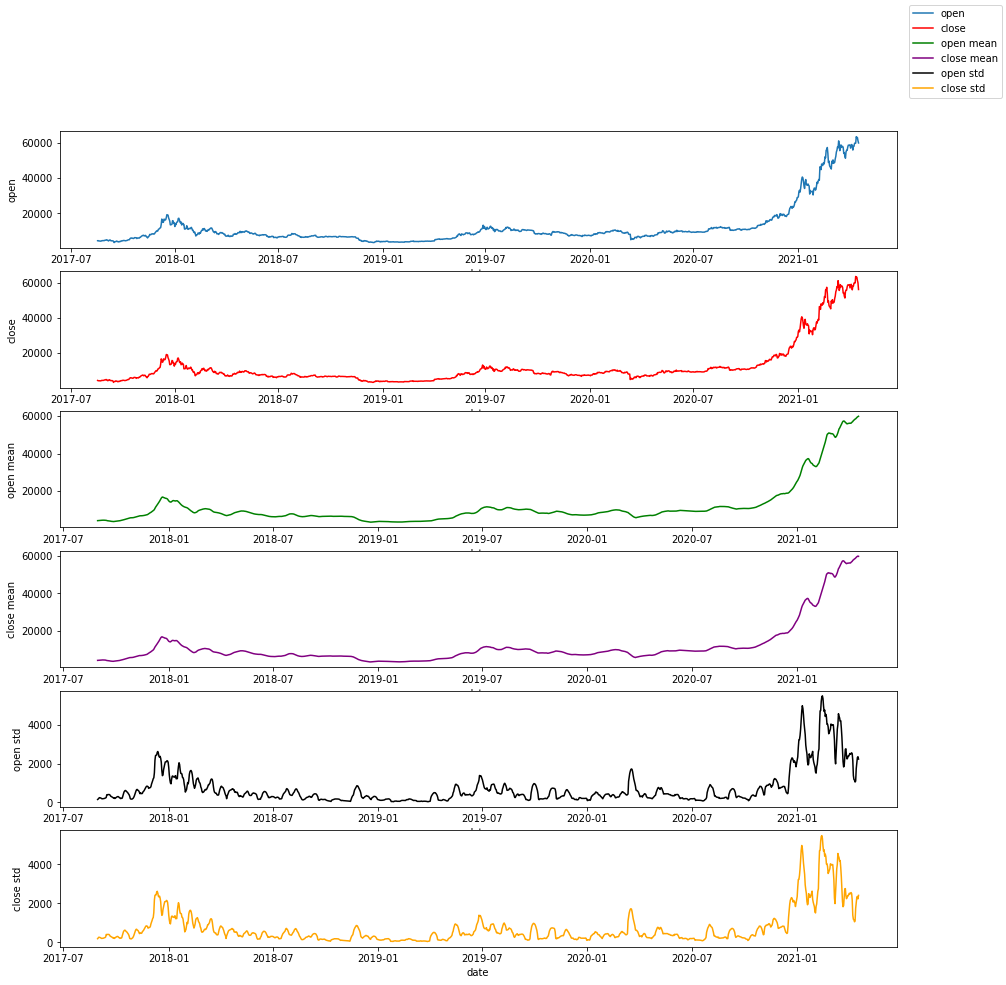

In [ ]:
fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(6,1,1)
data['open'].plot(kind='line',ax=ax1)
ax1.set_ylabel('open')
ax2=fig.add_subplot(6,1,2)
data['close'].plot(kind='line',ax=ax2,color='r')
ax2.set_ylabel('close')
ax3=fig.add_subplot(6,1,3)
data['open'].rolling(window=14).mean().plot(kind='line',ax=ax3,color='g',label='open mean')
ax3.set_ylabel('open mean')
ax4=fig.add_subplot(6,1,4)
data['close'].rolling(window=14).mean().plot(kind='line',ax=ax4,color='purple',label='close mean')
ax4.set_ylabel('close mean')
ax3=fig.add_subplot(6,1,5)
data['open'].rolling(window=14).std().plot(kind='line',ax=ax3,color='k',label='open std')
ax3.set_ylabel('open std')
ax4=fig.add_subplot(6,1,6)
data['close'].rolling(window=14).std().plot(kind='line',ax=ax4,color='orange',label='close std')
ax4.set_ylabel('close std')
fig.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin 
from sklearn.pipeline import Pipeline
from tensorflow import keras
import tensorflow

In [ ]:
class TimeSeriesDataGenerator(BaseEstimator,TransformerMixin):
  def __init__(self,lag=14):
    self.lag=lag
  
  def fit(self,X,y=None):
    return self
  
  def transform(self,X,y=None):
    X=X.copy()
    X_train=[]
    y_train=[]
    for i in range(0,X.shape[0]-self.lag,1):
      X_train.append(X[i:i+self.lag])
      y_train.append(X[i+self.lag])
    return np.array(X_train),np.array(y_train)

In [ ]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('tsdg',TimeSeriesDataGenerator())
])

train_X,train_y=pipeline.fit_transform(data)

In [ ]:
print('Training set number of pages: {}, rows: {}, columns: {}.'.format(train_X.shape[0],train_X.shape[1],train_X.shape[2]))
print('Training label number of rows: {}, columns: {}.'.format(train_y.shape[0],train_y.shape[1]))

Training set number of rows: 1327, columns: 14.
Training label number of rows: 1327, columns: 5.


In [ ]:
input_shape=train_X.shape[1:]
input=keras.Input(input_shape)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(input)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=False)(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dropout(0.2)(x)
x=keras.layers.Dense(512,activation='relu')(x)
output=keras.layers.Dense(5)(x)

model=keras.Model(inputs=input,outputs=output)

model.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Adam(0.001),
              metrics=[keras.metrics.mae]
)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 14, 5)]           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 14, 128)           68608     
_________________________________________________________________
lstm_6 (LSTM)                (None, 14, 128)           131584    
_________________________________________________________________
lstm_7 (LSTM)                (None, 14, 128)           131584    
_________________________________________________________________
lstm_8 (LSTM)                (None, 14, 128)           131584    
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               6604

In [ ]:
filepath='/content/best model'
modelcheckpoint=keras.callbacks.ModelCheckpoint(filepath,save_best_only=True)
lr=keras.callbacks.ReduceLROnPlateau()
history=model.fit(train_X,
          train_y,
          batch_size=32,
          epochs=200,
          validation_split=0.1,
          callbacks=[modelcheckpoint,lr],
          shuffle=False
)

Epoch 1/200
38/38 [==============================] - 10s 125ms/step - loss: 0.2547 - mean_absolute_error: 0.3608 - val_loss: 7.7894 - val_mean_absolute_error: 2.4383
INFO:tensorflow:Assets written to: /content/best model/assets
Epoch 2/200
38/38 [==============================] - 4s 92ms/step - loss: 0.3086 - mean_absolute_error: 0.4186 - val_loss: 8.2510 - val_mean_absolute_error: 2.5274
Epoch 3/200
38/38 [==============================] - 4s 92ms/step - loss: 0.2715 - mean_absolute_error: 0.3855 - val_loss: 8.3347 - val_mean_absolute_error: 2.5453
Epoch 4/200
38/38 [==============================] - 3s 92ms/step - loss: 0.2580 - mean_absolute_error: 0.3710 - val_loss: 30.0004 - val_mean_absolute_error: 4.1317
Epoch 5/200
38/38 [==============================] - 4s 93ms/step - loss: 0.3052 - mean_absolute_error: 0.4038 - val_loss: 714.4809 - val_mean_absolute_error: 16.0116
Epoch 6/200
38/38 [==============================] - 4s 93ms/step - loss: 12.6784 - mean_absolute_error: 0.5098 

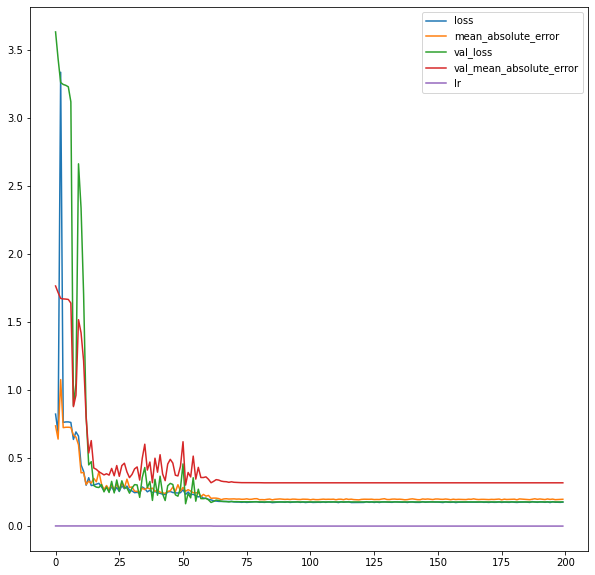

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,10))

In [ ]:
input_shape=train_X.shape[1:]
input=keras.Input(input_shape)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(input)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=True)(x)
x=keras.layers.LSTM(128, activation=keras.activations.relu, return_sequences=False)(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(512,activation='relu')(x)
x=keras.layers.Dropout(0.3)(x)
x=keras.layers.Dense(512,activation='relu')(x)
output=keras.layers.Dense(5)(x)

model1=keras.Model(inputs=input,outputs=output)

model1.compile(loss=keras.losses.mse,
              optimizer=keras.optimizers.Nadam(0.001),
              metrics=[keras.metrics.mae]
)

In [ ]:
filepath='/content/model number2'
modelcheckpoint=keras.callbacks.ModelCheckpoint(filepath,save_best_only=True)
lr=keras.callbacks.ReduceLROnPlateau()
history=model1.fit(train_X,
          train_y,
          batch_size=64,
          epochs=200,
          validation_split=0.1,
          callbacks=[modelcheckpoint,lr],
          shuffle=False
)

Epoch 1/200
5/5 [==============================] - 9s 360ms/step - loss: 0.7204 - mean_absolute_error: 0.7128 - val_loss: 3.3239 - val_mean_absolute_error: 1.6905
INFO:tensorflow:Assets written to: /content/model number2/assets
Epoch 2/200
5/5 [==============================] - 1s 175ms/step - loss: 0.6942 - mean_absolute_error: 0.6935 - val_loss: 3.3078 - val_mean_absolute_error: 1.6866
INFO:tensorflow:Assets written to: /content/model number2/assets
Epoch 3/200
5/5 [==============================] - 1s 171ms/step - loss: 0.5951 - mean_absolute_error: 0.5797 - val_loss: 3.2759 - val_mean_absolute_error: 1.6783
INFO:tensorflow:Assets written to: /content/model number2/assets
Epoch 4/200
5/5 [==============================] - 1s 173ms/step - loss: 0.5378 - mean_absolute_error: 0.5161 - val_loss: 3.2596 - val_mean_absolute_error: 1.6748
INFO:tensorflow:Assets written to: /content/model number2/assets
Epoch 5/200
5/5 [==============================] - 1s 174ms/step - loss: 0.4324 - mean_a

In [ ]:
import shutil
shutil.make_archive('model_n2','zip','/content/model number2')

'/content/model_n2.zip'

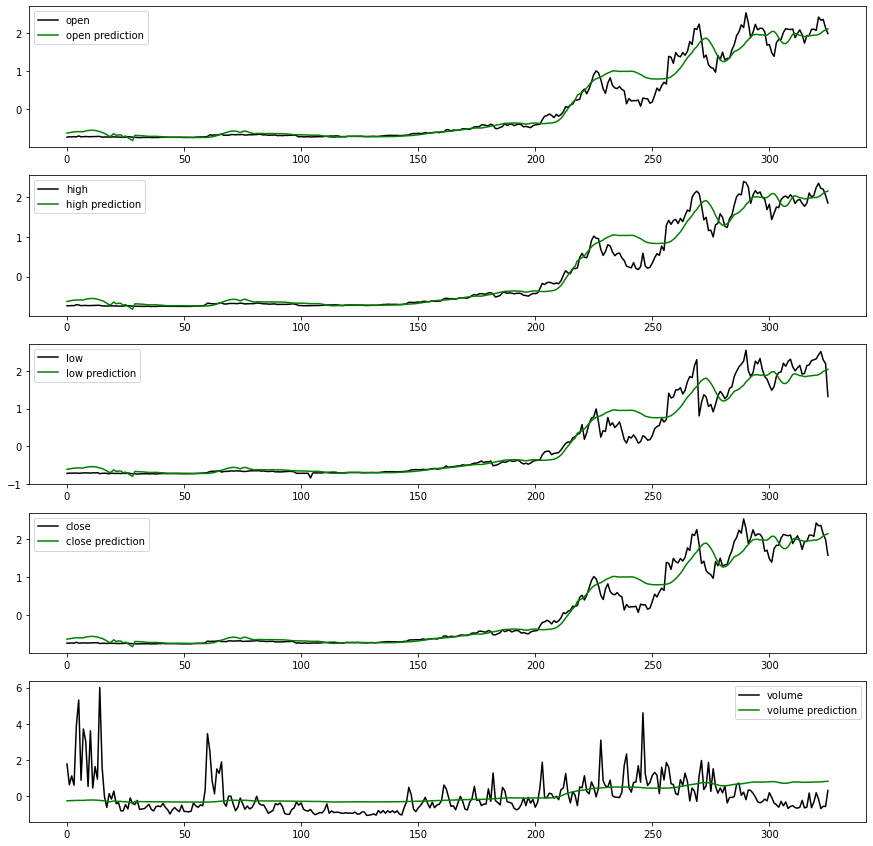

In [ ]:
def train_prediction_plot(y_pred):  
  fig=plt.figure(figsize=(15,15))
  rows=train_y.shape[0]
  columns=list(data.columns)
  color=['black','green']
  for i in range(len(columns)):
    ax=fig.add_subplot(len(columns),1,i+1)
    ax.plot(range(rows),train_y[:,i],color=color[0],label=columns[i])
    ax.plot(range(rows),y_pred[:,i],color=color[1],label='{} prediction'.format(columns[i]))
    ax.legend()
  plt.show()

y_pred=model1.predict(train_X)
train_prediction_plot(y_pred)

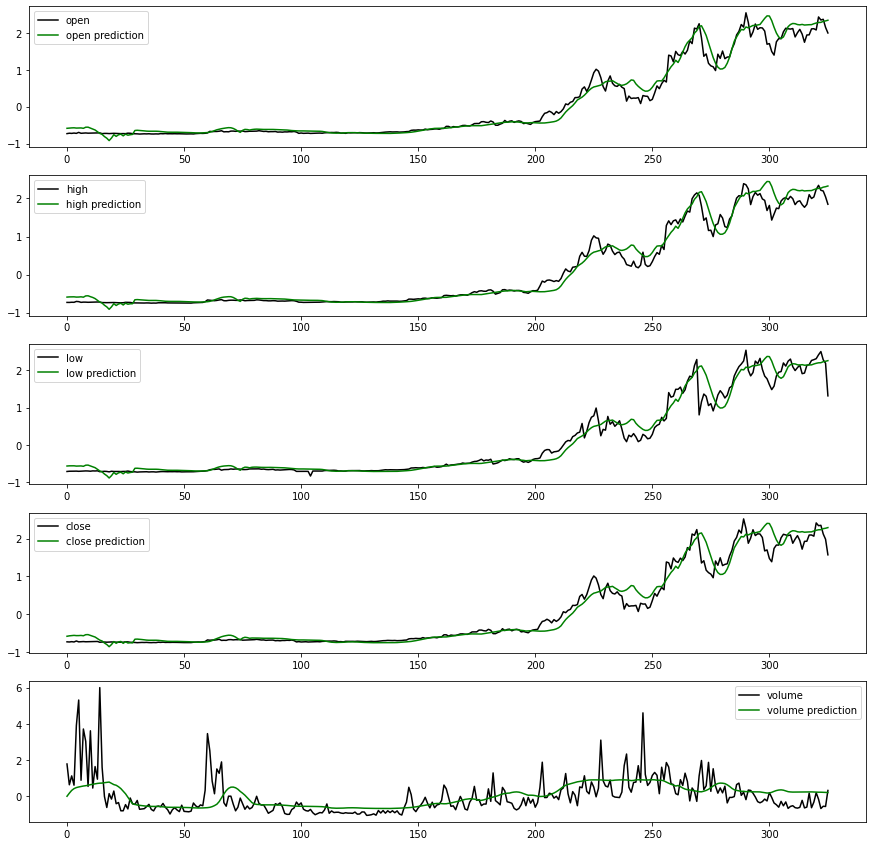

In [ ]:
y_pred=model.predict(train_X)
train_prediction_plot(y_pred)

In [ ]:
def make_future_forecast(n_days, model, lag=14):
  n_feat=5
  x=np.concatenate((train_X[-1],train_y[-1].reshape(-1,5)),axis=0)[1:]
  start_data=x.reshape(-1,lag,n_feat)
  for i in range(n_days):
    y_pred=model.predict(start_data[:,i:,:])
    y_c=y_pred.reshape(-1,1,n_feat)
    start_data=np.concatenate((start_data,y_c),axis=1)
  
  return start_data[:,14:,:]

In [ ]:
n_days=10
forecast=make_future_forecast(n_days,model)

In [ ]:
def forecast_plot(model,forecast=forecast):
  y_pred=model.predict(train_X)  
  fig=plt.figure(figsize=(15,15))
  rows=train_y.shape[0]
  columns=list(data.columns)
  color=['black','green','purple']
  for i in range(len(columns)):
    ax=fig.add_subplot(len(columns),1,i+1)
    ax.plot(range(rows),train_y[:,i],color=color[0],label=columns[i])
    ax.plot(range(rows),y_pred[:,i],color=color[1],label='{} prediction'.format(columns[i]))
    ax.plot(range(rows,rows+n_days),forecast[0,:,i],color=color[2],label='{} {}days forecaste'.format(columns[i],n_days))
    ax.legend()
  plt.show()

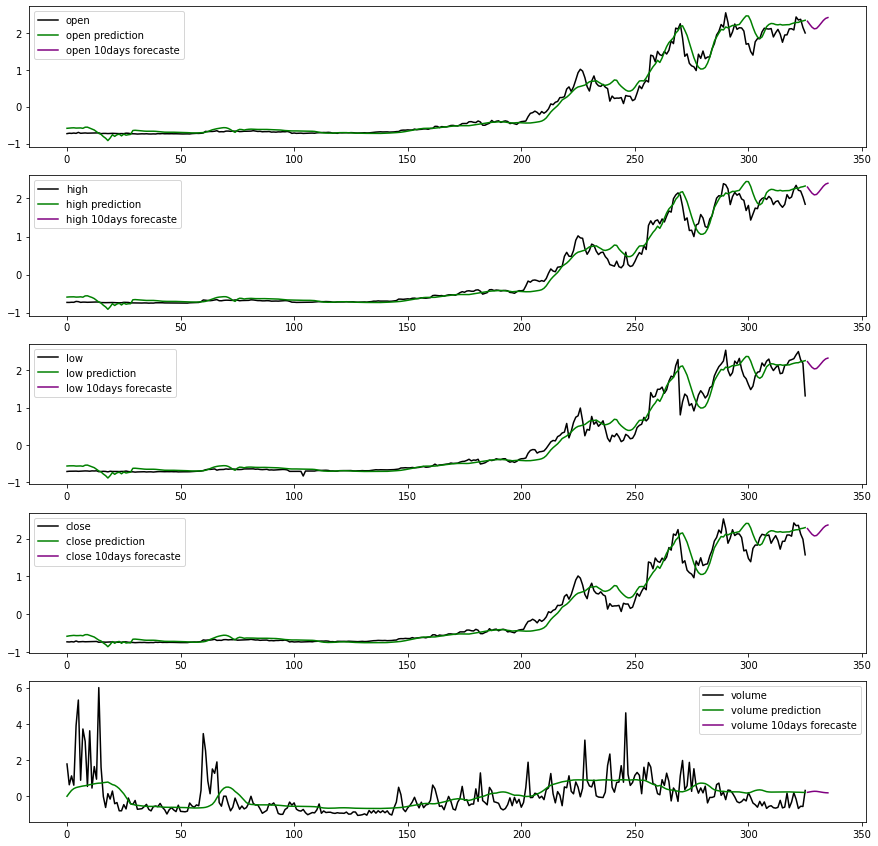

In [ ]:
forecast_plot(model)

## **Next Day Forecast** 

In [ ]:
t=make_future_forecast(1,model)
print(pipeline['scaler'].inverse_transform(t[0]))

[[1.95341455e+02 2.08013605e+02 1.76087508e+02 1.93295396e+02
  2.58278436e+05]]


#**Today's Data**

In [ ]:
data.iloc[-1]

open         175.92
high         178.48
low          124.00
close        150.75
volume    278743.41
Name: 2021-04-18, dtype: float64

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def trade_strategy(symbol):
    if symbol not in list_buy_trade:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade.remove(symbol)
          list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
          list_buy_trade.remove(symbol)
          list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        list_sell_trade.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade:
      if (df['close'].iloc[-1]<a*map_trade['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_trade['buy_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
        list_buy_trade.remove(symbol)
        list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade:
      if (df['close'].iloc[-1]>b*map_trade['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_trade['sell_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade.remove(symbol)
        list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def trade_alt_strategy(symbol):
    if symbol not in list_buy_trade_alt:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade_alt['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade_alt.remove(symbol)
          list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade_alt.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade_alt:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade_alt['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
          list_buy_trade_alt.remove(symbol)
          list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        list_sell_trade_alt.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade_alt:
      if (df['close'].iloc[-1]<a*map_trade_alt['buy_{}'.format(symbol)]) or (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
        list_buy_trade_alt.remove(symbol)
        list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade_alt:
      if (df['close'].iloc[-1]>b*map_trade_alt['sell_{}'.format(symbol)]) or (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade_alt.remove(symbol)
        list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'DOGEUSDT']

profit=[]
#while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
for a,b in stop_loss:
  
  list_buy_hma=[]
  list_sell_hma=[]
  list_profit_hma=[]
  map_hma={}
  removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_trade=[]
  list_sell_trade=[]
  list_profit_trade=[]
  map_trade={}
  removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
  list_buy_trade_alt=[]
  list_sell_trade_alt=[]
  list_profit_trade_alt=[]
  map_trade_alt={}
  removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])


  print('\n\n{},{} :-\n\n'.format(a,b))
  for hours in range(300,0,-2):
    
  
    for symbol in item_list:

        try: 
          
          print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          print(df['close'].tail())

          print('\n')
          tdf=trade_df(df)
          print(tdf.tail())
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          trade_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          trade_alt_strategy(symbol)

            
        except Exception as e:
          print(e)

  print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
  print('trade profit\n',sum(list_profit_trade),len(list_profit_trade),(np.array(list_profit_trade)>0).sum(),(np.array(list_profit_trade)<0).sum())
  print('trade alt profit\n',sum(list_profit_trade_alt),len(list_profit_trade_alt),(np.array(list_profit_trade_alt)>0).sum(),(np.array(list_profit_trade_alt)<0).sum())
  profit.append((list_profit_hma,list_profit_trade,list_profit_trade_alt))
  


Streaming output truncated to the last 5000 lines.

               ma05  ma10  ma90
date                           
1619452800000     1     1     1
1619467200000     1     1     1
1619481600000    -2     1     1
1619496000000     1     1     1
1619510400000     1     1     1

DOGEUSDT
date
1619452800000    0.27
1619467200000    0.27
1619481600000    0.27
1619496000000    0.27
1619510400000    0.28
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619452800000     1     1     1
1619467200000     1     1     1
1619481600000     1     1     1
1619496000000     1     1     1
1619510400000     1     1     1

BTCUSDT
date
1619452800000    54036.19
1619467200000    54001.39
1619481600000    53460.30
1619496000000    54545.01
1619510400000    55199.50
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619452800000     2     2    -1
1619467200000     2     2    -1
1619481600000     2     2    -1
16194960000

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def trade_strategy(symbol):
    if symbol not in list_buy_trade:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade.remove(symbol)
          list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
          list_buy_trade.remove(symbol)
          list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        list_sell_trade.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade:
      if (df['close'].iloc[-1]<a*map_trade['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_trade['buy_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
        list_buy_trade.remove(symbol)
        list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade:
      if (df['close'].iloc[-1]>b*map_trade['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_trade['sell_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade.remove(symbol)
        list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def trade_alt_strategy(symbol):
    if symbol not in list_buy_trade_alt:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade_alt['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade_alt.remove(symbol)
          list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade_alt.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade_alt:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade_alt['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
          list_buy_trade_alt.remove(symbol)
          list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        list_sell_trade_alt.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade_alt:
      if (df['close'].iloc[-1]<a*map_trade_alt['buy_{}'.format(symbol)]) or (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
        list_buy_trade_alt.remove(symbol)
        list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade_alt:
      if (df['close'].iloc[-1]>b*map_trade_alt['sell_{}'.format(symbol)]) or (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade_alt.remove(symbol)
        list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCHUSDT', 'YFIUSDT', 'MKRUSDT', 'ETHUSDT', 'AUTOUSDT', 'YFIIUSDT', 'PAXGUSDT', 'BCHUSDT', 'COMPUSDT', 'BNBUSDT']

#profit=[]

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade=[]
list_sell_trade=[]
list_profit_trade=[]
map_trade={}
removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade_alt=[]
list_sell_trade_alt=[]
list_profit_trade_alt=[]
map_trade_alt={}
removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

a,b=0.993,1.01

while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
#stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
#for a,b in stop_loss:
  
    '''list_buy_hma=[]
    list_sell_hma=[]
    list_profit_hma=[]
    map_hma={}
    removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade=[]
    list_sell_trade=[]
    list_profit_trade=[]
    map_trade={}
    removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade_alt=[]
    list_sell_trade_alt=[]
    list_profit_trade_alt=[]
    map_trade_alt={}
    removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])'''

  #print('\n\n{},{} :-\n\n'.format(a,b))
  #for hours in range(300,0,-2):'''
    
  
    for symbol in item_list:

        #try:
          
          print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          #klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          klines = client.get_historical_klines(symbol, '5m', "31 Dec, 2020")
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          print(df['close'].tail())

          print('\n')
          tdf=trade_df(df)
          print(tdf.tail())
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          trade_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          trade_alt_strategy(symbol)

            
        #except Exception as e:
        #  print(e)

    print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    print('trade profit\n',sum(list_profit_trade),len(list_profit_trade),(np.array(list_profit_trade)>0).sum(),(np.array(list_profit_trade)<0).sum())
    print('trade alt profit\n',sum(list_profit_trade_alt),len(list_profit_trade_alt),(np.array(list_profit_trade_alt)>0).sum(),(np.array(list_profit_trade_alt)<0).sum())
  #profit.append((list_profit_hma,list_profit_trade,list_profit_trade_alt))'''
  


Streaming output truncated to the last 5000 lines.

ETHUSDT
date
1619531700000    2554.76
1619532000000    2552.02
1619532300000    2537.88
1619532600000    2549.24
1619532900000    2547.15
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619531700000     1     1     1
1619532000000    -2    -2     1
1619532300000    -1    -2    -2
1619532600000     1    -2     1
1619532900000    -2    -2    -2

BNBUSDT
date
1619531700000    563.33
1619532000000    560.76
1619532300000    555.10
1619532600000    558.71
1619532900000    554.31
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619531700000    -2    -2     1
1619532000000    -2    -2     1
1619532300000    -2    -2    -2
1619532600000    -2    -2    -2
1619532900000    -2    -2    -2

BCHUSDT
date
1619531700000    862.75
1619532000000    857.81
1619532300000    851.40
1619532600000    854.97
1619532900000    851.06
Name: close, dtype: float64


    

KeyboardInterrupt: ignored

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def trade_strategy(symbol):
    if symbol not in list_buy_trade:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade.remove(symbol)
          list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
          list_buy_trade.remove(symbol)
          list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        list_sell_trade.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade:
      if (df['close'].iloc[-1]<a*map_trade['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_trade['buy_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
        list_buy_trade.remove(symbol)
        list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade:
      if (df['close'].iloc[-1]>b*map_trade['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_trade['sell_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade.remove(symbol)
        list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def trade_alt_strategy(symbol):
    if symbol not in list_buy_trade_alt:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade_alt['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade_alt.remove(symbol)
          list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade_alt.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade_alt:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade_alt['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
          list_buy_trade_alt.remove(symbol)
          list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        list_sell_trade_alt.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade_alt:
      if (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
        list_buy_trade_alt.remove(symbol)
        list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade_alt:
      if (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade_alt.remove(symbol)
        list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCHUSDT', 'YFIUSDT', 'MKRUSDT', 'ETHUSDT', 'AUTOUSDT', 'YFIIUSDT', 'PAXGUSDT', 'BCHUSDT', 'COMPUSDT', 'BNBUSDT']

#profit=[]

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade=[]
list_sell_trade=[]
list_profit_trade=[]
map_trade={}
removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade_alt=[]
list_sell_trade_alt=[]
list_profit_trade_alt=[]
map_trade_alt={}
removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

a,b=0.993,1.01

while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
#stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
#for a,b in stop_loss:
  
    '''list_buy_hma=[]
    list_sell_hma=[]
    list_profit_hma=[]
    map_hma={}
    removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade=[]
    list_sell_trade=[]
    list_profit_trade=[]
    map_trade={}
    removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade_alt=[]
    list_sell_trade_alt=[]
    list_profit_trade_alt=[]
    map_trade_alt={}
    removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])'''

  #print('\n\n{},{} :-\n\n'.format(a,b))
  #for hours in range(300,0,-2):'''
    
  
    for symbol in item_list:

        #try:
          
          print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          #klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          klines = client.get_historical_klines(symbol, '5m', "31 Dec, 2020")
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          print(df['close'].tail())

          print('\n')
          tdf=trade_df(df)
          print(tdf.tail())
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          trade_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          trade_alt_strategy(symbol)

            
        #except Exception as e:
        #  print(e)

    print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    print('trade profit\n',sum(list_profit_trade),len(list_profit_trade),(np.array(list_profit_trade)>0).sum(),(np.array(list_profit_trade)<0).sum())
    print('trade alt profit\n',sum(list_profit_trade_alt),len(list_profit_trade_alt),(np.array(list_profit_trade_alt)>0).sum(),(np.array(list_profit_trade_alt)<0).sum())
  #profit.append((list_profit_hma,list_profit_trade,list_profit_trade_alt))'''
  



BTCUSDT
date
1619532000000    54555.00
1619532300000    54402.22
1619532600000    54508.57
1619532900000    54439.45
1619533200000    54572.83
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619532000000    -2    -2    -2
1619532300000    -1    -2    -2
1619532600000    -1    -2    -2
1619532900000    -1    -2    -2
1619533200000     2    -1    -2

ETHUSDT
date
1619532000000    2552.02
1619532300000    2537.88
1619532600000    2549.24
1619532900000    2549.71
1619533200000    2559.92
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619532000000    -2    -2     1
1619532300000    -1    -2    -2
1619532600000     1    -2     1
1619532900000     1    -2     1
1619533200000     1     1     1

BNBUSDT
date
1619532000000    560.76
1619532300000    555.10
1619532600000    558.71
1619532900000    557.00
1619533200000    560.65
Name: close, dtype: float64


               ma05  ma10  ma90
date         

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def trade_strategy(symbol):
    if symbol not in list_buy_trade:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade.remove(symbol)
          list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
          list_buy_trade.remove(symbol)
          list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        list_sell_trade.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade:
      if (df['close'].iloc[-1]<a*map_trade['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_trade['buy_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
        list_buy_trade.remove(symbol)
        list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade:
      if (df['close'].iloc[-1]>b*map_trade['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_trade['sell_{}'.format(symbol)] and (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0)):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade.remove(symbol)
        list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def trade_alt_strategy(symbol):
    if symbol not in list_buy_trade_alt:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade_alt['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade_alt.remove(symbol)
          list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade_alt.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade_alt:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade_alt['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
          list_buy_trade_alt.remove(symbol)
          list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        list_sell_trade_alt.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade_alt:
      if (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
        list_buy_trade_alt.remove(symbol)
        list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade_alt:
      if (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade_alt.remove(symbol)
        list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCHUSDT', 'YFIUSDT', 'MKRUSDT', 'ETHUSDT', 'AUTOUSDT', 'YFIIUSDT', 'PAXGUSDT', 'BCHUSDT', 'COMPUSDT', 'BNBUSDT']

#profit=[]

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade=[]
list_sell_trade=[]
list_profit_trade=[]
map_trade={}
removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade_alt=[]
list_sell_trade_alt=[]
list_profit_trade_alt=[]
map_trade_alt={}
removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

a,b=0.993,1.01

while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
#stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
#for a,b in stop_loss:
  
    '''list_buy_hma=[]
    list_sell_hma=[]
    list_profit_hma=[]
    map_hma={}
    removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade=[]
    list_sell_trade=[]
    list_profit_trade=[]
    map_trade={}
    removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade_alt=[]
    list_sell_trade_alt=[]
    list_profit_trade_alt=[]
    map_trade_alt={}
    removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])'''

  #print('\n\n{},{} :-\n\n'.format(a,b))
  #for hours in range(300,0,-2):'''
    
  
    for symbol in item_list:

        #try:
          
          print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '1d', "1 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          #klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          klines = client.get_historical_klines(symbol, '5m', "31 Dec, 2020")
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          print(df['close'].tail())

          print('\n')
          tdf=trade_df(df)
          print(tdf.tail())
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          trade_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          trade_alt_strategy(symbol)

            
        #except Exception as e:
        #  print(e)

    print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    print('trade profit\n',sum(list_profit_trade),len(list_profit_trade),(np.array(list_profit_trade)>0).sum(),(np.array(list_profit_trade)<0).sum())
    print('trade alt profit\n',sum(list_profit_trade_alt),len(list_profit_trade_alt),(np.array(list_profit_trade_alt)>0).sum(),(np.array(list_profit_trade_alt)<0).sum())
  #profit.append((list_profit_hma,list_profit_trade,list_profit_trade_alt))'''
  


Streaming output truncated to the last 5000 lines.
1619536500000    4448.71
1619536800000    4451.93
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619535600000    -2     1     1
1619535900000     1     1     1
1619536200000     1     1     1
1619536500000    -2     1     1
1619536800000    -2     1     1

ETHUSDT
date
1619535900000    2626.01
1619536200000    2632.81
1619536500000    2626.18
1619536800000    2629.09
1619537100000    2629.99
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619535900000     1     1     1
1619536200000     1     1     1
1619536500000    -2     1     1
1619536800000     1     1     1
1619537100000     1     1     1

AUTOUSDT
date
1619535900000    2499.88
1619536200000    2500.02
1619536500000    2500.16
1619536800000    2499.97
1619537100000    2503.80
Name: close, dtype: float64


               ma05  ma10  ma90
date                           
1619535900000    -

In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
from datetime import date, datetime, timedelta, time
import pytz
from icecream import ic

def hma_strategy(symbol):

    if symbol not in (list_buy_hma):
      if open_hma.iloc[-1]<close_hma.iloc[-1]:
        map_hma['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_sell_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_hma.remove(symbol)
          list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        list_buy_hma.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return
    
    if symbol not in (list_sell_hma):
      if open_hma.iloc[-1]>close_hma.iloc[-1]:
        map_hma['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in (list_buy_hma):
          removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
          list_buy_hma.remove(symbol)
          list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        list_sell_hma.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_hma:
      if (df['close'].iloc[-1]<a*map_hma['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]>b*map_hma['buy_{}'.format(symbol)] and close_hma.iloc[-1]>open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_hma['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_hma['buy_{}'.format(symbol)]])
        list_buy_hma.remove(symbol)
        list_profit_hma.append(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_hma['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_hma:
      if (df['close'].iloc[-1]>b*map_hma['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]<a*map_hma['sell_{}'.format(symbol)] and close_hma.iloc[-1]<open_hma.iloc[-1]):
        removed_data_hma.loc[len(df.index)]=[now,symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_hma['sell_{}'.format(symbol)],df['close'].iloc[-1],map_hma['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_hma.remove(symbol)
        list_profit_hma.append(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        #print(map_hma['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1)
        return
      
def trade_strategy(symbol):
    if symbol not in list_buy_trade:
      if (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        map_trade['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade.remove(symbol)
          list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade:
      if (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        map_trade['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade:
          removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
          list_buy_trade.remove(symbol)
          list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        list_sell_trade.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade:
      if (tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade['buy_{}'.format(symbol)]])
        list_buy_trade.remove(symbol)
        list_profit_trade.append(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade:
      if (tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0):
        removed_data_trade.loc[len(df.index)]=[now,symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade.remove(symbol)
        list_profit_trade.append(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

def trade_alt_strategy(symbol):
    if symbol not in list_buy_trade_alt:
      if tdf['ma05'].iloc[-1]>0 and tdf['ma05'].iloc[-2]<0:
        map_trade_alt['buy_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_sell_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
          #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
          list_sell_trade_alt.remove(symbol)
          list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        list_buy_trade_alt.append(symbol)
        #print('bought:', symbol, df['close'].iloc[-1])
        return

    if symbol not in list_sell_trade_alt:
      if tdf['ma05'].iloc[-1]<0 and tdf['ma05'].iloc[-2]>0:
        map_trade_alt['sell_{}'.format(symbol)]=df['close'].iloc[-1]
        if symbol in list_buy_trade_alt:
          removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
          #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
          list_buy_trade_alt.remove(symbol)
          list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        list_sell_trade_alt.append(symbol)
        #print('Sell:', symbol, df['close'].iloc[-1])
        return
    
    if symbol in list_buy_trade_alt:
      if (df['close'].iloc[-1]>1.02*map_trade_alt['buy_{}'.format(symbol)]) or (df['close'].iloc[-1]<0.99*map_trade_alt['buy_{}'.format(symbol)]):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)],'exit bought']
        #print([symbol,map_trade_alt['buy_{}'.format(symbol)],df['close'].iloc[-1],df['close'].iloc[-1]-map_trade_alt['buy_{}'.format(symbol)]])
        list_buy_trade_alt.remove(symbol)
        list_profit_trade_alt.append(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        #print(df['close'].iloc[-1]/map_trade_alt['buy_{}'.format(symbol)] -1)
        return
        
    if symbol in list_sell_trade_alt:
      if (df['close'].iloc[-1]<0.99*map_trade_alt['sell_{}'.format(symbol)]) or (df['close'].iloc[-1]>1.02*map_trade_alt['sell_{}'.format(symbol)]):
        removed_data_trade_alt.loc[len(df.index)]=[now,symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1],'exit sell']
        #print([symbol,map_trade_alt['sell_{}'.format(symbol)],df['close'].iloc[-1],map_trade_alt['sell_{}'.format(symbol)]-df['close'].iloc[-1]])
        list_sell_trade_alt.remove(symbol)
        list_profit_trade_alt.append(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        #print(map_trade_alt['sell_{}'.format(symbol)]/df['close'].iloc[-1] -1 )
        return

api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
client = Client(api_key, api_secret)
tz=pytz.timezone('Asia/Kolkata')


item_list=['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'BCHUSDT', 'YFIUSDT', 'MKRUSDT', 'ETHUSDT', 'AUTOUSDT', 'YFIIUSDT', 'PAXGUSDT', 'BCHUSDT', 'COMPUSDT', 'BNBUSDT']

#profit=[]

list_buy_hma=[]
list_sell_hma=[]
list_profit_hma=[]
map_hma={}
removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade=[]
list_sell_trade=[]
list_profit_trade=[]
map_trade={}
removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
list_buy_trade_alt=[]
list_sell_trade_alt=[]
list_profit_trade_alt=[]
map_trade_alt={}
removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])

a,b=0.993,1.01 

while True:
#today_date=datetime.now().date()
#for days in range((today_date-date(2021,3,1)).days+1):
#stop_loss=[(0.993,1.009),(0.993,1.01),(0.992,1.015),(0.99,1.02),(0.983,1.02)]
#for a,b in stop_loss:
  
    '''list_buy_hma=[]
    list_sell_hma=[]
    list_profit_hma=[]
    map_hma={}
    removed_data_hma=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade=[]
    list_sell_trade=[]
    list_profit_trade=[]
    map_trade={}
    removed_data_trade=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])
    list_buy_trade_alt=[]
    list_sell_trade_alt=[]
    list_profit_trade_alt=[]
    map_trade_alt={}
    removed_data_trade_alt=pd.DataFrame(columns=['date','symbol','enter_p','close_p','profit_loss','call'])'''

  #print('\n\n{},{} :-\n\n'.format(a,b))
  #for hours in range(300,0,-2):'''
    
  
    for symbol in item_list:

        try:
          
          #print('\n',symbol,sep='')
          #print((date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y'))
          #klines = client.get_historical_klines(symbol, '30m', "31 Dec, 2020",(date(2021,3,1)+timedelta(days=days)).strftime('%d %b, %Y')) 
          #klines = client.get_historical_klines(symbol, '4h', "31 Dec, 2020",'{} hours ago UTC'.format(hours))
          klines = client.get_historical_klines(symbol, '5m', "31 Dec, 2020")
          # As you see above, there is no to_date i.e. current date is to_date. if you notice below, first date is from_date and second date is to_date, The task is to start incrementing to_date by one day from 1 Mar 2021 onward and loop till current date.
          # It will help us to backtest, same as cell 3 of other script
          # klines = client.get_historical_klines("ETHUSDT", '1d', "1 Dec, 2020", "4 Apr, 2021") 
          data = []
          for item in klines:
            data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
          df= pd.DataFrame(data)
          now =datetime.now(tz=tz)
          df.set_index(['date'], inplace=True)
          df.ta.stoch(append=True)
          open_hma = ta.hma(df['open'],8)
          close_hma = ta.hma(df['close'],8)
          #print(df['close'].tail())
          #print('\n')
          tdf=trade_df(df)
          #print(tdf.tail())
          # hma strategy
          #print('hma strategy')
          hma_strategy(symbol)
          # stochastic strategy
          #print('stochastic strategy')
          trade_strategy(symbol)
          # hma stochstic strategy
          #print('hma stochastic strategy')
          trade_alt_strategy(symbol)

            
        except Exception as e:
          print(e)

    print('hma profit\n',sum(list_profit_hma),len(list_profit_hma),(np.array(list_profit_hma)>0).sum(),(np.array(list_profit_hma)<0).sum())
    print('trade profit\n',sum(list_profit_trade),len(list_profit_trade),(np.array(list_profit_trade)>0).sum(),(np.array(list_profit_trade)<0).sum())
    print('trade alt profit\n',sum(list_profit_trade_alt),len(list_profit_trade_alt),(np.array(list_profit_trade_alt)>0).sum(),(np.array(list_profit_trade_alt)<0).sum())
  #profit.append((list_profit_hma,list_profit_trade,list_profit_trade_alt))
  


hma profit
 -0.0034096218398766975 2 0 2
trade profit
 0 0 0 0
trade alt profit
 0 0 0 0


In [ ]:
from binance.client import Client
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import time
from datetime import date,datetime

#LIME,MAROON,RUBI,GREEN,GRAY=1,-2,-1,2,0

#api_key = 'co8QtCcQodydBohXZPJShiu97SPuH9KeTVgfxH6yfciStC8PXVBTmCRw30hLn17b'
#api_secret = 'byfQwkXDHgn8xhQzi6L2Bh7uPH58GFW8cT0HlucxCyRywkphZAmfvKRQn9JXbM64'
#client = Client(api_key, api_secret)

# fetch 1 minute klines for the last day up until now
#klines = client.get_historical_klines("BNBBTC", Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

# fetch 30 minute klines for the last month of 2017
#klines = client.get_historical_klines("BTCUSDT", '30m', "15 Apr, 2021", "22 Apr, 2021") # BTCUSDT, ETHUSDT, BNBUSDT, DOGEUSDT 

# fetch weekly klines since it listed
#klines = client.get_historical_klines("NEOBTC", Client.KLINE_INTERVAL_1WEEK, "1 Jan, 2017")
#def time2datetime(tmsec):
#  tsec=int(tmsec)/1000
#  t=list(time.gmtime(tsec))
#  d=datetime(year=t[0],month=t[1],day=t[2],hour=t[3],minute=t[4])
#  return d

#data = []
#for item in klines:
#    data.append({'date': item[0], 'open': round(float(item[1]),2), 'high': round(float(item[2]),2), 'low': round(float(item[3]),2), 'close': round(float(item[4]),2), 'volume': round(float(item[5]),2)})
#df= pd.DataFrame(data)
#df.set_index(['date'], inplace=True)
#df.index=df.index.map(time2datetime)
#df.index = pd.to_datetime(df.index)
LIME,MAROON,RUBI,GREEN,GRAY=1,-2,-1,2,0
def maColor(_ma,_maref):
  diffma=change(_ma)
  length=len(_ma)
  res=np.zeros((length),dtype=np.int32)
  res[(diffma>=0) & (_ma>_maref)]=LIME
  #res[~((diffma>=0) & (_ma>_maref)) & ((diffma<0) & (_ma>_maref))]=MAROON
  res[(diffma<0) & (_ma>_maref)]=MAROON
  #res[~((diffma>=0) & (_ma>_maref)) & ~((diffma<0) & (_ma>_maref)) & ((diffma<=0) & (_ma<_maref))]=RUBI
  res[(diffma<=0) & (_ma<_maref)]=RUBI
  #res[~((diffma>=0) & (_ma>_maref)) & ~((diffma<0) & (_ma>_maref)) & ~((diffma<=0) & (_ma<_maref)) & ((diffma>=0) & (_ma<_maref))]=GREEN
  res[(diffma>=0) & (_ma<_maref)]=GREEN
  res[~(((diffma>=0) & (_ma>_maref)) | ((diffma<0) & (_ma>_maref)) | ((diffma<=0) & (_ma<_maref)) | ((diffma>=0) & (_ma<_maref)))]=GRAY
  return pd.Series(res)

def change(_ma,by=1):
  #fillval=0
  _ma=_ma.astype(np.float64)
  s=pd.Series(_ma)
  _s=s.shift(1)
  return s-_s

def trade_df(df):
  
  
  i_exp=True
  src=df['close']

  ma05  = ta.ema(src, 5) if i_exp else ta.sma(src, 5)
  ma10  = ta.ema(src, 10) if i_exp else ta.sma(src, 10)
  ma15  = ta.ema(src, 15) if i_exp else ta.sma(src, 15)
  ma20  = ta.ema(src, 20) if i_exp else ta.sma(src, 20)
  ma25  = ta.ema(src, 25) if i_exp else ta.sma(src, 25)
  ma30  = ta.ema(src, 30) if i_exp else ta.sma(src, 30)
  ma35  = ta.ema(src, 35) if i_exp else ta.sma(src, 35)
  ma40  = ta.ema(src, 40) if i_exp else ta.sma(src, 40)
  ma45  = ta.ema(src, 45) if i_exp else ta.sma(src, 45)
  ma50  = ta.ema(src, 50) if i_exp else ta.sma(src, 50)
  ma55  = ta.ema(src, 55) if i_exp else ta.sma(src, 55)
  ma60  = ta.ema(src, 60) if i_exp else ta.sma(src, 60)
  ma65  = ta.ema(src, 65) if i_exp else ta.sma(src, 65)
  ma70  = ta.ema(src, 70) if i_exp else ta.sma(src, 70)
  ma75  = ta.ema(src, 75) if i_exp else ta.sma(src, 75)
  ma80  = ta.ema(src, 80) if i_exp else ta.sma(src, 80)
  ma85  = ta.ema(src, 85) if i_exp else ta.sma(src, 85)
  ma90  = ta.ema(src, 90) if i_exp else ta.sma(src, 90)
  ma100 = ta.ema(src, 100) if i_exp else ta.sma(src, 100)

  p=pd.DataFrame()
  for i in [5,10,90]:
    p['ma0{}'.format(i) if i==5 else 'ma{}'.format(i)]=maColor(eval('ma0{}'.format(i)) if i==5 else eval('ma{}'.format(i)),ma100)
  p.index=df.index

  return p